In [10]:
import requests
import datetime
import json
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

long = -121.01
lati = 40.04
date = datetime.date(2005, 2, 2)
api_key = "6fd7602e43d3a565736ceeb030373e3a"

In [15]:
#sampled data from the 1.8m dataset of past fire hazards
sample_long = [-121.01, -120.9, -118.39, -123.67, -117.93, -118.75, -119.23, -123.56, -118.65, -120.32, -118.77, -122.32, -122.45, -123.03, -118.44, -116.74, -120.38, -119.83, -122.74, -117.45, -120.87, -122.56, -123.18, -121.01, -121.54, -121.99, -117.22, -122.9, -121.04, -119.77, -123.34, -119.79, -120.02, -119.93, -117.72, -120.37, -123.38, -123.47, -118.94, -120.92, -120.79, -116.85, -118.48, -122.41, -119.32, -120.48, -118.54, -117.5, -123.36, -121.09, -121.32, -118.65, -119.91, -120.09, -118.08, -118.52, -121.11, -120.94, -121.05, -116.83, -123.01, -119.4, -120.81, -117.78, -116.7, -121.26, -120.71, -117.14, -122.32, -120.03, -121.07, -118.93, -118.77, -123.97, -119.88, -118.67, -119.61, -118.7, -117.38, -118.28, -118.9, -122.38, -118.54, -118.63, -121.11, -118.22, -119.11, -123.98, -118.02, -117.39, -123.6, -121.17, -122.94, -117.69, -120.6, -120.3, -118.25, -123.3, -121.55, -123.86, -123.08, -118.42, -120.37, -119.33, -123.18, -116.74, -120.23, -121.12, -119.85, -116.62, -119.17, -120.28, -121.04, -123.46, -117.18, -120.8, -120.03, -120.0, -116.69, -123.54, -123.98, -121.22, -120.02, -118.68, -117.68, -120.16, -120.97, -119.42, -120.88, -120.47, -121.32, -118.76, -116.95, -120.8, -120.44, -120.02, -120.5, -121.78, -119.27, -122.92, -123.7, -123.67, -123.72, -123.68, -123.68, -123.27, -117.07, -118.75, -114.61, -114.56, -118.55, -118.5, -118.43, -119.46, -120.79, -118.28, -121.01, -120.94, -117.32, -117.18, -118.23, -116.83, -115.83, -115.2, -117.23, -116.64, -117.34, -117.16, -120.67, -120.63, -123.06, -123.1, -120.47, -123.1, -116.15, -118.82, -115.28, -118.76, -119.6, -119.6, -123.67, -123.6, -123.68, -123.7, -123.68, -123.69, -123.67, -123.71, -123.28, -116.95, -118.8, -118.8, -120.4, -120.33, -120.99, -120.9, -120.99, -120.19, -119.7, -119.0, -120.92, -120.29, -120.67, -121.09, -121.07, -120.88, -120.49, -119.46, -119.47, -120.61, -120.85, -119.9, -120.55, -116.66, -116.36, -116.66, -118.42, -117.72, -117.11, -117.42, -116.5, -116.59, -117.25, -117.26, -117.14, -115.65, -116.51, -116.3, -116.57, -117.3, -121.32, -121.53, -120.6, -120.66, -121.79, -122.4, -121.55, -121.48, -120.01, -122.58, -120.15, -122.47, -122.44, -121.52, -121.92, -120.52, -118.67, -118.62, -122.72, -118.2, -119.6, -119.7, -116.88, -120.92, -120.79, -116.29, -120.57, -121.85, -119.28, -120.41, -116.85, -120.46, -116.29, -120.6, -116.3, -122.1, -120.4, -120.96, -120.04, -116.86, -120.65, -116.84, -120.33, -116.85, -116.74, -121.54, -121.54, -121.66, -120.84, -121.02, -121.79, -121.53, -120.86, -121.75, -121.23, -121.7, -119.8, -119.58, -119.49, -120.72, -119.65, -119.52, -119.42, -119.74, -119.41, -119.57, -119.53, -119.83, -120.21, -120.17, -119.82, -120.17, -119.8, -119.58, -119.53, -120.46, -118.5, -120.0, -120.06, -119.79, -121.11, -120.6, -120.05, -120.05, -120.59, -120.08, -120.32, -119.88, -119.52, -120.57, -119.89, -120.33, -120.16, -120.02, -120.27, -120.13, -120.65, -120.03, -120.9, -119.92, -119.79, -120.31, -119.91, -120.12, -120.03, -119.94, -119.59, -120.08, -120.41, -120.66, -120.78, -119.74, -120.32, -120.82, -120.06, -120.3, -121.01, -120.14, -120.73, -120.47, -120.15, -120.84, -120.24, -120.25, -121.01, -120.51, -120.88, -120.36, -120.71, -120.55, -120.61, -119.45, -119.21, -119.28, -119.26, -119.23, -118.64, -119.26, -119.12, -119.39, -118.64, -119.11, -119.4, -119.28, -119.14, -119.35, -119.0, -119.49, -119.11, -119.22, -119.08, -122.12, -122.38, -121.91, -121.92, -122.34, -122.27, -123.93, -124.17, -124.03, -123.97, -123.8, -124.18, -124.03, -124.18, -122.75, -122.69, -122.86, -122.6, -122.9, -122.79, -122.38, -122.0, -122.71, -122.25, -123.01, -122.77, -122.95, -123.46, -123.22, -123.4, -123.21, -122.14, -123.36, -123.24, -123.35, -123.8, -123.76, -122.58, -121.63, -121.3, -121.71, -121.69, -122.02, -122.09, -121.33, -121.7, -121.74, -121.57, -121.15, -122.05, -122.03, -121.63, -121.87, -121.16, -121.05, -120.83, -120.83, -120.66, -120.87, -120.72, -120.96, -121.12, -120.97, -120.68, -121.14, -120.92, -120.75, -122.99, -120.92, -121.05, -121.57, -121.59, -122.05, -121.44, -121.87, -121.59, -121.85, -121.85, -121.7, -121.7, -121.45, -121.57, -121.55, -121.35, -121.64, -121.51, -121.59, -121.8, -120.84, -121.2, -120.66, -121.09, -120.42, -120.41, -121.34, -120.98, -121.43, -121.25, -122.66, -121.14, -120.9, -120.83, -121.05, -121.03, -121.35, -120.98, -120.13, -121.31, -121.2, -121.07, -121.22, -121.27, -121.29, -120.94, -122.42, -122.36, -121.63, -122.44, -122.91, -122.17, -122.26, -122.18, -122.44, -121.51, -121.8, -121.96, -121.96, -122.29, -122.12, -122.25, -122.37, -122.12, -122.43, -122.31, -122.12, -122.25, -122.26, -122.19, -122.43, -122.3, -122.58, -122.2, -122.52, -122.25, -122.43, -122.26, -117.04, -118.38, -117.58, -117.05, -117.46, -117.04, -117.36, -117.04, -117.27, -118.32, -118.28, -116.32, -116.56, -117.06, -117.22, -116.29, -116.88, -117.0, -116.66, -116.61, -117.17, -116.8, -116.51, -117.13, -116.68, -116.92, -116.88, -116.95, -116.28, -117.2, -117.27, -117.23, -116.21, -116.96, -117.11, -117.6, -116.59, -116.75, -116.21, -116.86, -116.92, -116.4, -116.88, -116.91, -117.0, -117.48, -117.18, -117.43, -116.78, -117.15, -117.25, -116.19, -117.29, -117.11, -117.29, -117.41, -117.22, -116.33, -117.22, -117.18, -117.22, -117.01, -117.36, -117.15, -116.88, -117.27, -117.6, -117.27, -116.99, -117.29, -117.23, -117.3, -120.36, -120.7, -120.53, -120.6, -120.48, -120.63, -120.48, -120.52, -120.54, -120.46, -120.26, -123.2, -120.81, -120.53, -116.88, -116.89, -116.35, -119.08, -119.75, -122.62, -121.97, -117.74, -119.05, -118.53, -123.66, -116.17, -119.45, -122.04, -121.67, -123.05, -120.46, -122.23, -121.59, -117.29, -117.2, -123.66, -118.87, -120.37, -120.11, -117.28, -121.83, -119.33, -117.85, -117.32, -117.07, -118.34, -121.63, -121.75, -119.91, -117.27, -121.06, -116.93, -122.74, -122.19, -120.52, -118.39, -116.68, -121.66, -116.41, -118.54, -119.94, -116.67, -123.69, -123.25, -120.75, -117.49, -121.5, -120.37, -119.52, -118.67, -122.01, -119.79, -120.07, -116.58, -120.91, -117.74, -117.5, -116.59, -120.46, -121.82, -120.54, -120.22, -118.92, -123.32, -123.33, -120.36, -118.38, -116.96, -120.68, -120.88, -123.7, -119.86, -123.67, -118.65, -121.98, -117.24, -116.54, -119.66, -120.46, -119.76, -116.55, -117.24, -119.92, -122.42, -119.72, -123.59, -121.08, -121.28, -118.97, -120.45, -116.64, -119.65, -120.5, -121.18, -122.13, -120.85, -120.57, -122.59, -118.53, -116.71, -122.14, -121.5, -117.45, -119.32, -121.21, -123.65, -120.12, -121.09, -124.4, -122.59, -117.42, -120.74, -123.72, -122.24, -124.21, -120.93, -119.08, -120.96, -114.79, -121.58, -117.04, -117.14, -121.47, -120.32, -118.82, -120.67, -116.5, -120.14, -123.87, -119.15, -120.19, -118.68, -118.89, -121.78, -120.85, -121.67, -122.4, -120.57, -120.47, -120.31, -119.44, -117.04, -120.97, -122.53, -119.38, -121.74, -124.12, -121.91, -123.92, -120.46, -123.36, -118.72, -120.8, -120.03, -122.88, -122.57, -121.04, -121.22, -119.47, -122.25, -120.73, -119.65, -121.17, -123.8, -120.66, -120.99, -118.82, -116.55, -116.54, -120.96, -122.87, -120.44, -122.22, -121.73, -117.23, -122.68, -121.6, -116.69, -120.88, -116.99, -118.97, -121.44, -120.51, -121.56, -118.9]
sample_lati = [40.04, 39.65, 34.68, 41.23, 34.33, 34.65, 37.3, 41.3, 34.54, 38.7, 34.63, 40.77, 40.79, 41.85, 35.65, 33.8, 39.41, 38.28, 39.61, 34.27, 40.14, 40.98, 41.55, 41.56, 41.39, 41.6, 34.23, 40.28, 39.93, 38.08, 41.55, 38.64, 38.76, 38.69, 34.36, 38.77, 41.78, 41.42, 34.67, 41.89, 40.15, 34.26, 35.63, 40.72, 36.98, 39.31, 35.59, 33.6, 41.81, 41.51, 39.94, 35.88, 37.53, 39.22, 34.41, 37.34, 40.2, 41.46, 39.71, 34.2, 40.91, 37.06, 39.14, 34.16, 32.65, 40.83, 40.17, 34.17, 40.73, 38.9, 40.93, 37.77, 36.04, 41.85, 37.81, 36.03, 37.46, 34.58, 33.51, 34.45, 36.8, 40.94, 34.48, 35.65, 41.33, 34.62, 37.61, 41.84, 34.18, 34.27, 41.56, 40.52, 39.46, 34.39, 41.55, 38.95, 34.62, 40.37, 40.72, 41.91, 41.24, 35.64, 39.25, 37.35, 41.83, 33.7, 38.73, 39.55, 38.67, 32.83, 37.87, 41.46, 40.85, 41.94, 34.26, 39.72, 37.75, 38.15, 32.75, 40.89, 41.81, 40.67, 39.43, 35.49, 34.2, 38.18, 40.03, 34.76, 40.58, 39.27, 41.55, 34.67, 33.26, 40.27, 40.05, 38.15, 39.23, 36.23, 37.48, 39.18, 41.08, 41.05, 41.1, 41.03, 41.07, 39.79, 33.37, 36.0, 32.78, 34.77, 37.78, 35.6, 35.65, 35.16, 38.16, 37.15, 39.28, 39.17, 34.95, 35.13, 35.38, 32.58, 33.51, 34.53, 33.79, 33.48, 33.79, 33.41, 40.41, 40.56, 40.75, 40.57, 41.05, 40.83, 33.98, 36.6, 35.3, 34.08, 37.5, 37.77, 41.03, 41.2, 41.07, 41.09, 41.06, 41.06, 41.04, 41.1, 39.8, 33.28, 36.03, 36.02, 38.36, 37.9, 38.69, 38.91, 38.69, 36.07, 37.21, 35.47, 38.88, 37.64, 38.66, 39.14, 39.15, 38.26, 37.89, 35.13, 35.13, 38.0, 38.63, 37.43, 38.24, 33.93, 32.73, 33.93, 34.43, 34.47, 33.93, 33.75, 33.88, 33.08, 33.79, 33.74, 33.69, 33.67, 32.68, 33.72, 34.06, 33.65, 39.53, 39.53, 41.27, 41.03, 40.54, 40.64, 39.55, 39.66, 39.99, 39.04, 41.47, 40.54, 39.22, 41.0, 40.47, 37.92, 36.42, 36.54, 37.95, 34.04, 37.74, 37.67, 32.63, 37.05, 37.32, 33.78, 37.18, 36.96, 35.93, 37.25, 32.74, 37.21, 33.77, 37.16, 33.76, 40.02, 37.14, 37.27, 39.89, 33.76, 39.27, 33.74, 41.8, 34.24, 33.9, 36.9, 36.82, 36.88, 35.8, 36.13, 36.53, 36.9, 35.83, 36.55, 36.47, 36.55, 36.55, 36.83, 36.8, 36.2, 36.86, 36.6, 36.68, 36.68, 36.6, 36.73, 36.61, 36.97, 35.9, 35.94, 36.7, 36.16, 36.79, 36.8, 36.66, 36.89, 35.15, 37.48, 37.05, 36.89, 37.15, 37.4, 36.93, 36.98, 37.05, 36.98, 37.3, 37.25, 37.29, 37.37, 36.99, 37.11, 37.04, 37.13, 37.14, 37.02, 37.05, 36.99, 37.05, 37.16, 36.99, 37.28, 37.47, 37.66, 36.95, 36.84, 37.1, 37.09, 37.33, 36.96, 37.44, 37.1, 37.15, 37.46, 36.98, 37.24, 37.09, 36.93, 37.81, 37.76, 37.87, 37.92, 38.03, 38.27, 38.1, 37.83, 37.88, 38.19, 38.02, 38.35, 38.34, 36.48, 36.48, 36.54, 36.57, 36.48, 35.81, 35.81, 36.15, 36.52, 36.24, 35.8, 36.55, 36.54, 36.42, 35.87, 36.15, 36.52, 36.2, 35.96, 36.62, 37.06, 37.27, 37.0, 37.05, 37.51, 37.45, 40.02, 41.81, 40.79, 40.43, 40.93, 41.77, 40.91, 41.75, 38.9, 38.92, 38.66, 38.22, 38.66, 39.09, 38.37, 38.58, 38.3, 38.22, 38.47, 38.6, 38.41, 39.59, 39.12, 40.0, 39.82, 38.74, 39.51, 39.16, 39.09, 39.38, 39.42, 39.02, 37.79, 37.04, 37.72, 37.88, 37.71, 37.69, 37.59, 37.83, 37.12, 37.06, 37.41, 37.69, 37.99, 37.76, 37.18, 38.52, 38.65, 38.72, 38.71, 38.75, 38.86, 38.8, 38.82, 38.23, 38.73, 38.34, 38.52, 38.79, 38.68, 38.5, 38.79, 38.65, 39.53, 39.52, 38.71, 39.89, 39.76, 39.84, 39.83, 39.5, 39.91, 39.37, 39.43, 39.69, 39.66, 39.63, 39.9, 39.45, 39.66, 39.66, 40.36, 41.39, 41.22, 40.29, 41.51, 39.32, 39.42, 39.02, 38.93, 39.2, 38.3, 38.93, 39.31, 39.16, 38.95, 38.96, 38.95, 39.02, 39.29, 39.12, 38.77, 39.05, 38.88, 38.91, 38.82, 39.12, 40.4, 40.57, 41.06, 40.48, 40.76, 40.72, 40.43, 40.83, 40.47, 40.56, 40.49, 40.51, 40.73, 41.36, 41.26, 41.24, 41.6, 41.26, 41.37, 41.3, 40.02, 40.09, 40.01, 40.02, 39.99, 40.19, 39.59, 39.85, 39.68, 40.24, 40.01, 40.27, 34.03, 37.38, 34.44, 34.03, 34.38, 34.03, 34.51, 34.06, 34.16, 37.33, 37.17, 32.65, 32.83, 33.34, 33.26, 32.66, 33.04, 33.06, 32.58, 32.58, 33.18, 33.02, 32.68, 33.12, 32.58, 33.0, 32.87, 32.91, 33.72, 33.94, 33.79, 33.44, 33.62, 33.94, 33.75, 33.94, 33.94, 33.9, 33.64, 33.92, 33.93, 33.82, 33.74, 33.54, 33.85, 33.97, 33.74, 34.0, 33.52, 33.98, 33.85, 33.68, 34.0, 33.82, 33.82, 34.0, 33.94, 33.69, 33.95, 33.95, 33.95, 33.78, 33.85, 33.91, 33.77, 33.69, 33.97, 33.77, 33.98, 33.85, 33.77, 33.95, 35.14, 35.73, 35.53, 35.19, 35.04, 35.49, 35.03, 35.0, 35.65, 35.2, 38.06, 40.42, 41.82, 41.66, 34.23, 34.08, 32.67, 35.44, 37.83, 41.44, 41.06, 34.23, 34.9, 36.0, 41.02, 33.76, 36.26, 39.12, 40.87, 38.31, 38.09, 40.0, 37.74, 33.76, 33.97, 39.16, 36.14, 36.12, 36.88, 33.92, 38.0, 36.16, 34.63, 33.86, 32.78, 33.76, 39.08, 37.69, 36.94, 33.66, 38.7, 33.74, 38.47, 40.01, 37.35, 34.27, 32.84, 36.4, 33.64, 36.0, 38.28, 33.42, 41.08, 39.79, 38.73, 34.42, 39.41, 36.79, 36.9, 34.1, 38.44, 36.88, 36.97, 33.03, 39.15, 33.72, 34.0, 33.96, 34.71, 40.51, 35.09, 37.87, 35.45, 38.57, 41.15, 39.83, 34.31, 33.34, 41.6, 39.95, 41.79, 35.85, 41.03, 34.05, 38.43, 33.91, 33.82, 37.31, 37.3, 36.59, 33.84, 33.79, 37.06, 37.5, 36.68, 39.37, 39.34, 37.92, 35.37, 34.63, 32.6, 36.31, 37.84, 38.94, 37.13, 38.63, 37.37, 41.66, 34.47, 33.72, 41.72, 41.63, 34.25, 37.32, 37.64, 41.02, 41.32, 40.84, 40.43, 38.88, 34.36, 38.59, 41.19, 40.45, 41.87, 41.45, 36.33, 39.18, 33.61, 39.14, 33.97, 33.55, 37.75, 41.83, 36.75, 39.17, 32.79, 37.82, 41.91, 37.29, 37.62, 36.35, 34.13, 37.9, 38.14, 40.88, 38.35, 37.36, 37.08, 37.29, 36.75, 34.01, 38.66, 38.58, 36.65, 36.95, 40.24, 39.82, 40.32, 35.51, 39.95, 34.13, 38.69, 39.24, 41.68, 38.81, 38.99, 39.23, 37.09, 38.28, 41.0, 37.33, 38.83, 39.45, 35.54, 38.89, 36.13, 34.22, 34.08, 37.05, 40.81, 37.97, 38.86, 39.92, 33.24, 38.21, 39.87, 33.92, 37.89, 33.23, 34.08, 36.91, 38.4, 37.71, 34.8]
sample_date = [1107302400.0, 1122681600.0, 1119830400.0, 1128729600.0, 1124064000.0, 1149984000.0, 1153699200.0, 1152921600.0, 1157328000.0, 1154563200.0, 1157328000.0, 1150243200.0, 1154908800.0, 1177545600.0, 1182556800.0, 1187654400.0, 1184025600.0, 1191456000.0, 1190332800.0, 1189468800.0, 1214092800.0, 1214092800.0, 1214611200.0, 1217980800.0, 1222041600.0, 1223337600.0, 1217289600.0, 1243814400.0, 1246924800.0, 1247875200.0, 1249084800.0, 1252800000.0, 1254009600.0, 702432000.0, 719884800.0, 708566400.0, 711331200.0, 709171200.0, 719971200.0, 713577600.0, 711158400.0, 711158400.0, 705801600.0, 709948800.0, 706752000.0, 715132800.0, 713664000.0, 740966400.0, 744249600.0, 745718400.0, 743817600.0, 747014400.0, 744249600.0, 742521600.0, 772502400.0, 764380800.0, 773798400.0, 774921600.0, 780451200.0, 726796800.0, 772416000.0, 770428800.0, 780883200.0, 807580800.0, 807321600.0, 802137600.0, 808358400.0, 813542400.0, 809740800.0, 802310400.0, 839980800.0, 839808000.0, 836611200.0, 840931200.0, 837648000.0, 840240000.0, 842313600.0, 829267200.0, 790041600.0, 860803200.0, 865123200.0, 870652800.0, 870480000.0, 873244800.0, 873158400.0, 873158400.0, 870048000.0, 902966400.0, 902880000.0, 904521600.0, 905558400.0, 903657600.0, 908841600.0, 910656000.0, 931910400.0, 935798400.0, 936316800.0, 934934400.0, 933465600.0, 931564800.0, 932774400.0, 924480000.0, 933897600.0, 932947200.0, 960940800.0, 966297600.0, 966124800.0, 954806400.0, 967507200.0, 967852800.0, 965692800.0, 994636800.0, 1001376000.0, 1000512000.0, 992217600.0, 1001808000.0, 991958400.0, 1001376000.0, 1000252800.0, 1022371200.0, 1034121600.0, 1038441600.0, 1026432000.0, 1030579200.0, 1026691200.0, 1056844800.0, 1057536000.0, 1061683200.0, 1056240000.0, 1059264000.0, 1062720000.0, 1064275200.0, 1067126400.0, 1088640000.0, 1092355200.0, 1092960000.0, 1088640000.0, 1095638400.0, 1095465600.0, 774662400.0, 715219200.0, 776649600.0, 811900800.0, 875059200.0, 931132800.0, 842313600.0, 806976000.0, 863913600.0, 769219200.0, 833760000.0, 745891200.0, 808876800.0, 873158400.0, 901584000.0, 906336000.0, 926121600.0, 931305600.0, 936662400.0, 706838400.0, 740534400.0, 774403200.0, 829526400.0, 836784000.0, 869356800.0, 899251200.0, 905990400.0, 929750400.0, 937612800.0, 899942400.0, 908841600.0, 932428800.0, 937008000.0, 770169600.0, 780710400.0, 715478400.0, 781574400.0, 772848000.0, 903830400.0, 750470400.0, 903225600.0, 969753600.0, 1003622400.0, 1035849600.0, 1087689600.0, 1124496000.0, 1158192000.0, 1188777600.0, 1238112000.0, 1022630400.0, 1060041600.0, 1150502400.0, 1251590400.0, 954460800.0, 963187200.0, 969148800.0, 992476800.0, 998870400.0, 1022803200.0, 1029369600.0, 1053648000.0, 1059350400.0, 1066435200.0, 1085961600.0, 1092182400.0, 1117756800.0, 1123113600.0, 1130976000.0, 1150502400.0, 1154822400.0, 1170460800.0, 1181520000.0, 1187308800.0, 1196640000.0, 959558400.0, 974505600.0, 995414400.0, 1013990400.0, 1030924800.0, 1059264000.0, 1083542400.0, 1099353600.0, 1120694400.0, 1132444800.0, 1150934400.0, 1136246400.0, 1174521600.0, 1181001600.0, 1186012800.0, 1191715200.0, 1199059200.0, 959212800.0, 969753600.0, 994636800.0, 1000512000.0, 1027209600.0, 1056240000.0, 1062115200.0, 1083628800.0, 1092268800.0, 1121299200.0, 1150848000.0, 1157846400.0, 1180915200.0, 1187827200.0, 1214006400.0, 1214006400.0, 999561600.0, 1248825600.0, 1236816000.0, 1245024000.0, 1002931200.0, 1171843200.0, 774489600.0, 930528000.0, 958867200.0, 950486400.0, 996451200.0, 1036195200.0, 1020902400.0, 1064793600.0, 1062806400.0, 1078617600.0, 1125878400.0, 1119571200.0, 1151366400.0, 1148947200.0, 1179273600.0, 1203120000.0, 1122595200.0, 970876800.0, 997574400.0, 1033084800.0, 1059177600.0, 1058140800.0, 1117670400.0, 984873600.0, 1023580800.0, 1067040000.0, 1125100800.0, 1173830400.0, 751680000.0, 744336000.0, 774576000.0, 836956800.0, 927072000.0, 928972800.0, 966384000.0, 1023494400.0, 1060992000.0, 1096588800.0, 1152921600.0, 1178150400.0, 1188086400.0, 1211328000.0, 1221177600.0, 1254009600.0, 1278201600.0, 712022400.0, 740448000.0, 752025600.0, 772934400.0, 802483200.0, 831859200.0, 842572800.0, 874713600.0, 926208000.0, 1213833600.0, 962496000.0, 987465600.0, 995760000.0, 1022976000.0, 1032307200.0, 1057104000.0, 1064275200.0, 1084406400.0, 1091577600.0, 1120176000.0, 1132012800.0, 1155340800.0, 1176336000.0, 1183248000.0, 1189555200.0, 1208736000.0, 1212969600.0, 1217894400.0, 1242604800.0, 1247702400.0, 1276732800.0, 697248000.0, 706924800.0, 710208000.0, 713923200.0, 721008000.0, 740361600.0, 746668800.0, 767059200.0, 773107200.0, 778550400.0, 806630400.0, 829526400.0, 836524800.0, 843350400.0, 864432000.0, 870739200.0, 899424000.0, 906422400.0, 930441600.0, 940204800.0, 1002240000.0, 1062547200.0, 1124582400.0, 1178841600.0, 1207612800.0, 705024000.0, 713232000.0, 746841600.0, 774403200.0, 815788800.0, 838166400.0, 867283200.0, 931651200.0, 963878400.0, 992390400.0, 1024876800.0, 1057104000.0, 1084147200.0, 1106956800.0, 1125619200.0, 1156636800.0, 1179964800.0, 703987200.0, 712627200.0, 740448000.0, 751075200.0, 777772800.0, 813715200.0, 836524800.0, 862790400.0, 872035200.0, 904003200.0, 934588800.0, 965952000.0, 1110499200.0, 1187827200.0, 740793600.0, 806716800.0, 898214400.0, 991526400.0, 1060387200.0, 1140912000.0, 1213574400.0, 716947200.0, 781228800.0, 833673600.0, 871776000.0, 953683200.0, 968976000.0, 715132800.0, 745545600.0, 769824000.0, 781920000.0, 807840000.0, 837388800.0, 847497600.0, 875664000.0, 908323200.0, 932515200.0, 1025136000.0, 1058486400.0, 1085097600.0, 1150761600.0, 1211328000.0, 1033430400.0, 740707200.0, 773107200.0, 835142400.0, 869616000.0, 934675200.0, 1060819200.0, 1022889600.0, 1057622400.0, 1089504000.0, 1125619200.0, 1156896000.0, 1190678400.0, 1219276800.0, 704592000.0, 712886400.0, 751248000.0, 775526400.0, 835315200.0, 844646400.0, 900547200.0, 931219200.0, 1064361600.0, 707184000.0, 867628800.0, 711072000.0, 1120176000.0, 764208000.0, 992390400.0, 811728000.0, 1089158400.0, 1218931200.0, 807321600.0, 927504000.0, 1024531200.0, 707443200.0, 1189555200.0, 803692800.0, 937440000.0, 1092182400.0, 1251417600.0, 1213833600.0, 839808000.0, 804124800.0, 1165276800.0, 775008000.0, 1057708800.0, 810691200.0, 998179200.0, 1148860800.0, 781142400.0, 908755200.0, 837388800.0, 1218326400.0, 837648000.0, 1116028800.0, 1021593600.0, 807753600.0, 709257600.0, 837302400.0, 932688000.0, 776044800.0, 964828800.0, 1157328000.0, 1217116800.0, 1276300800.0, 810000000.0, 711504000.0, 986428800.0, 1196640000.0, 769910400.0, 997747200.0, 866937600.0, 1002326400.0, 1125014400.0, 705283200.0, 780192000.0, 903139200.0, 722217600.0, 1170115200.0, 721440000.0, 1026345600.0, 869443200.0, 1087776000.0, 713145600.0, 705283200.0, 714096000.0, 1055721600.0, 858211200.0, 867888000.0, 1089072000.0, 774230400.0, 772416000.0, 1217980800.0, 840758400.0, 807235200.0, 1160956800.0, 707961600.0, 780710400.0, 937180800.0, 861753600.0, 1182124800.0, 808012800.0, 1260230400.0, 1151366400.0, 840153600.0, 834364800.0, 936403200.0, 1147305600.0, 744940800.0, 900806400.0, 808531200.0, 804211200.0, 1088294400.0, 940377600.0, 1019260800.0, 1084147200.0, 1157328000.0, 1215216000.0, 708998400.0, 737510400.0, 752716800.0, 804211200.0, 789868800.0, 862963200.0, 907027200.0, 970444800.0, 1020643200.0, 1079654400.0, 1145664000.0, 1188172800.0, 1238198400.0, 717897600.0, 743040000.0, 771465600.0, 781747200.0, 808963200.0, 788918400.0, 836092800.0, 857779200.0, 871171200.0, 896918400.0, 936144000.0, 962841600.0, 985219200.0, 998265600.0, 1020643200.0, 1052006400.0, 1062547200.0, 1089763200.0, 1118448000.0, 1127779200.0, 1151020800.0, 1164844800.0, 1178236800.0, 1182729600.0, 1206403200.0, 1215216000.0, 1220659200.0, 1243900800.0, 1254960000.0, 1281657600.0, 705888000.0, 709430400.0, 713145600.0, 719712000.0, 737510400.0, 741830400.0, 746236800.0, 753753600.0, 770947200.0, 776131200.0, 786326400.0, 804816000.0, 808876800.0, 814924800.0, 831168000.0, 835401600.0, 839548800.0, 859420800.0, 864864000.0, 873244800.0, 897177600.0, 903571200.0, 909964800.0, 930009600.0, 940377600.0, 995328000.0, 1058227200.0, 1122163200.0, 1161561600.0, 1213142400.0, 712540800.0, 769305600.0, 814320000.0, 862704000.0, 905040000.0, 1271635200.0, 1279584000.0, 1280016000.0, 1280275200.0, 1284249600.0, 1285459200.0, 1240012800.0, 1275264000.0, 1285891200.0, 1312070400.0, 1315094400.0, 1310256000.0, 1315612800.0, 1308787200.0, 1311724800.0, 1306368000.0, 1312588800.0, 1304467200.0, 1315785600.0, 1304035200.0, 1264550400.0, 1311552000.0, 1315008000.0, 1305072000.0, 1313712000.0, 1311984000.0, 1306886400.0, 1310860800.0, 1299888000.0, 1307404800.0, 1320278400.0, 1316131200.0, 1308096000.0, 1308096000.0, 1310860800.0, 1305936000.0, 1307750400.0, 1310947200.0, 1311465600.0, 1309564800.0, 1313625600.0, 1309305600.0, 1319760000.0, 1314921600.0, 1306022400.0, 1330732800.0, 1342483200.0, 1350950400.0, 1346284800.0, 1294963200.0, 1346889600.0, 1344643200.0, 1339891200.0, 1345334400.0, 1340236800.0, 1344643200.0, 1338768000.0, 1295395200.0, 1348099200.0, 1330819200.0, 1342915200.0, 1295654400.0, 1341878400.0, 1331856000.0, 1340150400.0, 1345161600.0, 1337472000.0, 1343433600.0, 1330128000.0, 1343606400.0, 1350432000.0, 1352851200.0, 1333843200.0, 1350518400.0, 1376092800.0, 1372723200.0, 1374364800.0, 1379203200.0, 1377043200.0, 1363478400.0, 1377129600.0, 1372550400.0, 1378166400.0, 1377129600.0, 1367280000.0, 1371772800.0, 1360195200.0, 1371945600.0, 1325721600.0, 1369440000.0, 1368489600.0, 1374710400.0, 1373500800.0, 1375401600.0, 1377216000.0, 1377561600.0, 1377993600.0, 1369526400.0, 1370563200.0, 1366761600.0, 1370995200.0, 1364774400.0, 1371340800.0, 1377388800.0, 1384905600.0, 1383523200.0, 1384732800.0, 1384128000.0, 1357603200.0, 1410825600.0, 1407628800.0, 1406678400.0, 1393804800.0, 1406073600.0, 1358380800.0, 1397865600.0, 1408406400.0, 1407542400.0, 1406678400.0, 1357257600.0, 1399680000.0, 1419724800.0, 1412121600.0, 1358812800.0, 1401840000.0, 1405900800.0, 1410739200.0, 1358121600.0, 1400544000.0, 1404086400.0, 1407801600.0, 1413417600.0, 1358985600.0, 1437436800.0, 1435795200.0, 1438300800.0, 1440720000.0, 1438128000.0, 1433808000.0, 1438300800.0, 1438473600.0, 1445817600.0, 1446768000.0, 1434672000.0, 1431734400.0, 1433116800.0, 1433462400.0, 1428969600.0, 1433721600.0, 1442707200.0, 1436486400.0, 1441411200.0, 1435708800.0, 1438560000.0, 1438905600.0, 1438646400.0, 1436313600.0, 1443916800.0, 1447113600.0, 1446854400.0, 1249516800.0, 1366156800.0, 1251936000.0, 1345593600.0, 1239494400.0, 1285545600.0, 1242864000.0, 1232064000.0, 1434931200.0, 1280275200.0, 1245715200.0, 1254614400.0, 1404259200.0, 1240531200.0, 1275696000.0, 1245110400.0, 1280016000.0, 1433894400.0, 1278201600.0, 1281744000.0, 1249603200.0, 1371168000.0, 1245715200.0, 1338163200.0, 1242691200.0, 1341273600.0, 1243036800.0, 1280102400.0, 1435622400.0, 1275004800.0, 1428105600.0, 1288569600.0, 1423094400.0, 1279238400.0, 1434672000.0]
sample_fire = [0.1, 0.2, 800.0, 0.1, 0.1, 0.1, 0.1, 2.0, 15.0, 0.2, 162702.0, 0.1, 0.25, 0.1, 88.0, 100.0, 0.1, 0.25, 0.2, 0.1, 0.1, 2.0, 0.1, 0.1, 0.1, 0.25, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.1, 1.0, 0.5, 0.1, 1.0, 0.3, 0.1, 0.1, 0.1, 0.1, 23.0, 0.1, 0.2, 0.1, 3.0, 0.1, 3.0, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 50.0, 0.1, 0.1, 0.3, 7.0, 1.0, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1, 1.0, 0.5, 0.5, 5.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2.0, 2.0, 0.1, 0.1, 0.1, 120.0, 0.1, 6.0, 0.1, 0.1, 0.1, 10.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1, 0.3, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 3.0, 4.0, 0.2, 0.1, 0.3, 0.1, 0.1, 5.0, 0.1, 0.1, 313.0, 0.1, 56427.0, 0.25, 0.1, 0.5, 0.25, 0.1, 0.2, 0.1, 0.1, 20.0, 0.1, 1.0, 4.0, 0.1, 8.0, 0.5, 0.1, 3.0, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 0.5, 0.1, 20.0, 0.1, 0.1, 300.0, 0.3, 0.2, 1.0, 5.0, 0.1, 0.1, 0.5, 1.0, 0.2, 0.1, 1.0, 0.1, 1.0, 1.0, 0.5, 0.1, 0.1, 0.5, 2.0, 0.2, 0.1, 5.0, 6.0, 0.5, 0.5, 0.1, 7.0, 0.1, 0.1, 90.0, 10.0, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 102.0, 1.0, 0.1, 1.0, 0.1, 15.0, 5.0, 0.1, 0.1, 0.1, 104.0, 5.6, 1.0, 0.1, 5.0, 0.1, 2.0, 0.1, 0.2, 16460.0, 0.1, 0.5, 8.0, 0.3, 1.0, 0.1, 20.0, 0.1, 0.1, 0.1, 0.3, 3.0, 0.2, 0.1, 0.2, 0.1, 0.1, 4.0, 0.5, 6.0, 1.0, 0.1, 0.2, 29.0, 44.0, 5.0, 508.0, 2.2, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 100.0, 0.1, 0.1, 0.1, 0.3, 0.2, 0.1, 2462.0, 0.1, 0.1, 0.1, 300.0, 0.1, 0.5, 1.0, 0.1, 1.0, 0.1, 0.1, 1.0, 0.5, 2.0, 0.1, 0.1, 2.0, 0.5, 7.0, 1.0, 5.0, 15.0, 0.1, 0.2, 0.1, 0.1, 1.0, 35.0, 0.1, 5.0, 0.5, 0.1, 1.0, 1.0, 20.0, 0.5, 0.1, 0.1, 1.0, 5.0, 0.1, 1.0, 0.3, 0.1, 2.0, 0.5, 0.1, 1.0, 2.0, 0.1, 3.0, 1.0, 1.0, 0.3, 0.3, 1.0, 2.0, 1.0, 0.5, 0.2, 0.1, 20.0, 3.0, 5.0, 0.3, 60.0, 1.0, 0.1, 1.0, 0.5, 3.0, 2.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.3, 2.0, 0.2, 2.0, 4.0, 2.0, 300.0, 0.5, 5.0, 0.1, 0.1, 1.0, 0.3, 1.0, 0.2, 2.0, 0.1, 0.3, 0.3, 1.0, 1.0, 0.1, 0.1, 0.1, 5.0, 25.0, 0.2, 1.0, 0.1, 1.0, 0.3, 0.1, 0.1, 1.0, 0.2, 0.3, 0.3, 0.5, 0.2, 1.0, 1.0, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2.0, 0.3, 1.0, 55.0, 1.0, 1.2, 0.3, 0.1, 0.1, 1.0, 2.1, 0.1, 0.5, 39.0, 0.1, 0.3, 0.1, 1.0, 0.1, 0.1, 5.0, 125.0, 1.0, 0.1, 3.0, 0.1, 4.5, 1.0, 0.3, 0.2, 0.2, 0.3, 2.0, 2.0, 5.0, 0.1, 0.1, 0.5, 1.0, 0.1, 0.1, 0.1, 0.1, 0.5, 4.0, 0.2, 1.0, 7.0, 1.0, 0.3, 0.1, 15.0, 1.0, 0.5, 1.0, 0.3, 0.3, 0.1, 0.1, 2.0, 0.2, 0.1, 0.2, 0.5, 1.0, 3.0, 1.0, 1.0, 2.0, 0.1, 0.1, 1.0, 0.1, 0.1, 0.1, 0.3, 0.8, 0.3, 0.1, 1.0, 0.5, 0.2, 2.0, 3.0, 0.5, 0.2, 0.1, 1.0, 0.1, 0.1, 96.0, 1.0, 0.1, 1.0, 0.1, 2.0, 0.1, 5.0, 0.1, 3.0, 0.1, 0.1, 2.0, 1.0, 0.1, 1.0, 0.1, 1.0, 0.1, 0.1, 1.0, 0.1, 0.1, 0.3, 0.1, 0.2, 0.1, 0.1, 5.0, 4.0, 1.0, 0.1, 0.1, 0.2, 2.0, 0.1, 1.0, 0.1, 2.0, 1.0, 0.1, 0.1, 1.0, 1.0, 0.1, 1.0, 1.0, 0.1, 170.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.3, 2.0, 2.0, 0.1, 1.0, 0.3, 0.1, 5.0, 0.3, 0.1, 0.3, 0.1, 0.1, 0.1, 0.5, 0.1, 4.0, 0.1, 0.3, 0.3, 12.0, 6.0, 1.0, 1.0, 0.1, 2.5, 0.1, 1.0, 1.0, 0.2, 1.0, 0.1, 5.0, 80.0, 0.5, 0.4, 1.0, 0.2, 1.0, 0.5, 0.1, 0.1, 5.0, 1.0, 0.1, 2.0, 2.0, 0.2, 0.2, 1.0, 0.5, 1.0, 3.0, 0.1, 0.1, 0.1, 0.1, 2.0, 23.6, 0.5, 1.0, 1.0, 0.1, 0.5, 0.2, 0.1, 1.5, 0.1, 22.5, 0.1, 0.2, 0.1, 0.1, 1.0, 0.3, 0.1, 0.1, 0.5, 15.0, 0.25, 0.2, 15.4, 0.5, 0.1, 0.1, 0.1, 0.25, 4.5, 3.0, 0.25, 1.5, 6.0, 0.8, 6.3, 1.0, 0.01, 0.01, 0.01, 0.11, 5.1, 1.0, 1.0, 0.25, 1.0, 0.1, 0.1, 0.01, 3.0, 0.1, 1.0, 0.05, 0.5, 0.01, 0.1, 0.1, 0.01, 0.01, 0.1, 0.3, 0.2, 0.3, 5.0, 5.0, 1.0, 1.0, 0.11, 75.0, 1.0, 0.5, 0.25, 0.1, 0.01, 0.1, 1.0, 0.01, 0.1, 3.0, 1.0, 0.08, 0.25, 1.0, 0.1, 0.25, 0.1, 48.0, 0.25, 0.2, 0.1, 0.3, 0.3, 2.0, 0.05, 0.01, 0.02, 1.0, 0.1, 0.01, 1.0, 2.0, 0.1, 0.5, 0.1, 0.2, 0.1, 0.01, 0.01, 0.1, 0.01, 1.0, 2.0, 0.1, 0.2, 0.1, 0.1, 0.12, 0.1, 0.1, 0.1, 0.1, 0.25, 0.1, 0.1, 2.6, 9.0, 100.0, 0.1, 0.1, 0.1, 0.14, 0.3, 0.1, 7.5, 0.2, 1.0, 0.1, 2.0, 1.0, 0.1, 1.0, 0.1, 0.1, 0.1, 0.1, 204.0, 4.7, 0.1, 1.0, 0.3, 0.5, 0.01, 0.64, 0.01, 0.1, 0.01, 2.0, 1.0, 0.1, 0.1, 0.12, 0.01, 0.1, 0.25, 7.6, 0.01, 0.01, 0.5, 0.2, 1.0, 1.0, 0.1, 2.0, 1.0, 0.5, 0.01, 1.0, 2.0, 0.5, 1.0, 0.01, 1.0, 5.0, 0.1, 0.5, 0.01, 1.0, 1.5, 0.12, 0.1, 0.25, 1.0, 0.1, 1.0, 0.1, 1.0, 19.0, 0.25, 0.5, 4.0, 0.25, 2.0, 0.21]
info_all = []

In [17]:
#suppress some extreme data
for i in sample_fire:
    if i> 1000:
        i = 1000
print(max(sample_fire))

162702.0


In [3]:
def form_uri(key,la,lo,date):
    uri = "https://api.darksky.net/forecast/"+key+"/"+str(la)+","+str(lo)+","+str(int(date))+"?exclude=daily,flags"
    return uri

In [4]:
def collect_all(info, key, s_la, s_lo, s_date):
    for i in range(len(s_la)):
        uri = form_uri(key, s_la[i], s_lo[i], s_date[i])
        response = requests.get(uri)
        temp = json.loads(response.text)
        info.append(temp["currently"])
    return info

In [5]:
# info_all = collect_all(info_all, api_key, sample_lati, sample_long, sample_date)
# df_all = pd.DataFrame(info_all, columns = ['time','summary','precipIntensity'
#                                            , 'precipProbability','temperature'
#                                            , 'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed'
#                                            , 'windGust', 'windBearing']) 
# df_all

In [6]:
# info_all = collect_all(info_all, api_key, sample_lati, sample_long, sample_date)
# df_all = pd.DataFrame(info_all, columns = ['time', 'summary','precipIntensity'
#                                            , 'precipProbability','temperature'
#                                            , 'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed'
#                                            , 'windGust', 'windBearing']) 
#df_all.to_csv('weather.csv')

In [8]:
df_all = pd.read_csv('weather.csv') 

In [9]:
df_all.describe()

,time,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing
count,8.040000e+02,518.000000,518.000000,721.000000,721.000000,718.000000,718.000000,725.000000,475.000000,714.000000
mean,1.056831e+09,0.000262,0.010985,79.586755,79.564702,44.980320,0.344220,7.588759,12.965663,242.511204
std,2.226933e+08,0.002526,0.085818,14.212045,14.452329,10.233912,0.198885,3.902807,5.039093,71.002760
min,6.972480e+08,0.000000,0.000000,34.470000,29.310000,2.740000,0.040000,0.000000,2.150000,0.000000
25%,8.591184e+08,0.000000,0.000000,69.240000,69.240000,38.615000,0.200000,4.710000,9.915000,215.000000
50%,1.058184e+09,0.000000,0.000000,81.910000,81.940000,46.490000,0.280000,6.670000,12.020000,258.000000
75%,1.246018e+09,0.000000,0.000000,90.220000,90.220000,52.655000,0.440000,9.840000,15.025000,290.000000
max,1.447114e+09,0.043000,1.000000,108.620000,108.620000,67.040000,1.000000,25.280000,38.100000,359.000000


In [10]:
df_all.summary.unique()

array(['Clear', 'Possible Light Rain', 'Mostly Cloudy', 'Overcast', nan,
       'Partly Cloudy', 'Windy', 'Foggy', 'Light Rain', 'Drizzle',
       'Possible Drizzle'], dtype=object)

In [11]:
df_all['summary'].value_counts()

Clear                  584
Overcast                50
Partly Cloudy           47
Mostly Cloudy           36
Possible Drizzle         2
Foggy                    2
Light Rain               2
Possible Light Rain      1
Drizzle                  1
Windy                    1
Name: summary, dtype: int64

In [ ]:
plt.plot(df2.weight,df2.height,'.')
plt.xlabel("Weight")
plt.ylabel("Height");

In [12]:
df_all['precipIntensity'].value_counts()

0.0000    503
0.0013      2
0.0048      1
0.0057      1
0.0096      1
0.0007      1
0.0430      1
0.0277      1
0.0003      1
0.0018      1
0.0005      1
0.0118      1
0.0045      1
0.0199      1
0.0028      1
Name: precipIntensity, dtype: int64

In [15]:
df_all['apparentTemperature'].describe()

count    721.000000
mean      79.564702
std       14.452329
min       29.310000
25%       69.240000
50%       81.940000
75%       90.220000
max      108.620000
Name: apparentTemperature, dtype: float64

In [16]:
df_all['humidity'].describe()

count    718.000000
mean       0.344220
std        0.198885
min        0.040000
25%        0.200000
50%        0.280000
75%        0.440000
max        1.000000
Name: humidity, dtype: float64

In [17]:
df_all['windSpeed'].describe()

count    725.000000
mean       7.588759
std        3.902807
min        0.000000
25%        4.710000
50%        6.670000
75%        9.840000
max       25.280000
Name: windSpeed, dtype: float64

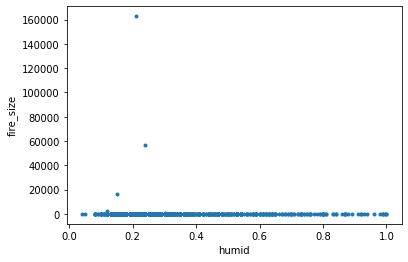

In [13]:
plt.plot(df_all.humidity,sample_fire,'.')
plt.xlabel("humid")
plt.ylabel("fire_size");